Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



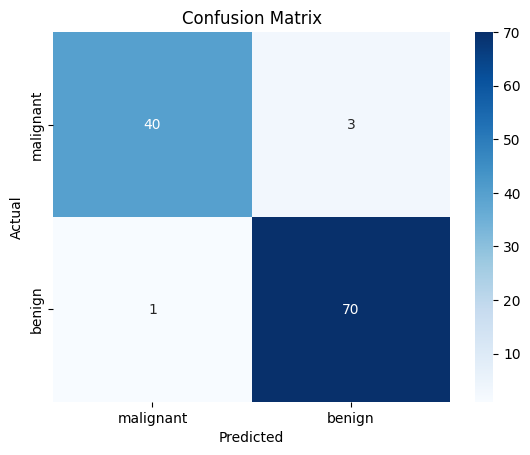

✅ Model and column names saved.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Feature and target split
X = df.drop("target", axis=1)
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save model and feature names
joblib.dump(model, "breast_cancer_model.pkl")
joblib.dump(X.columns.tolist(), "breast_cancer_model_columns.pkl")
print("✅ Model and column names saved.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [4]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_model.pkl to breast_cancer_model (1).pkl


In [5]:
from google.colab import files
uploaded = files.upload()


Saving breast_cancer_model_columns.pkl to breast_cancer_model_columns (1).pkl


In [6]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load model and column names
model = joblib.load("breast_cancer_model.pkl")
model_columns = joblib.load("breast_cancer_model_columns.pkl")

st.set_page_config(page_title="🩺 Breast Cancer Predictor", layout="wide")
st.title("🧬 Breast Cancer Prediction App")
st.write("Provide input values below to predict if the tumor is *Malignant* or *Benign*.")

mean_radius = st.slider("Mean Radius", 6.0, 30.0, 14.0)
mean_texture = st.slider("Mean Texture", 9.0, 40.0, 19.0)
mean_perimeter = st.slider("Mean Perimeter", 40.0, 190.0, 90.0)
mean_area = st.slider("Mean Area", 140.0, 2500.0, 600.0)
mean_smoothness = st.slider("Mean Smoothness", 0.05, 0.2, 0.1)

input_data = pd.DataFrame(np.zeros((1, len(model_columns))), columns=model_columns)
input_data["mean radius"] = mean_radius
input_data["mean texture"] = mean_texture
input_data["mean perimeter"] = mean_perimeter
input_data["mean area"] = mean_area
input_data["mean smoothness"] = mean_smoothness

st.subheader("Input Data Preview")
st.dataframe(input_data)

if st.button("Predict"):
    prediction = model.predict(input_data)
    proba = model.predict_proba(input_data)

    classes = ['Malignant', 'Benign']
    predicted_class = classes[prediction[0]]

    st.success(f"🔍 Predicted Diagnosis: *{predicted_class}*")
    st.subheader("Prediction Probabilities")
    for i, label in enumerate(classes):
        st.write(f"{label}: *{proba[0][i]:.2f}*")


Writing app.py


In [8]:
!ngrok config add-authtoken "303KfKLkeQXTuy8t8tRNyD3LOM4_35YNPecVUJJLQh52ab6f2"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [9]:
from pyngrok import ngrok

# Kill previous tunnels
ngrok.kill()

# Run Streamlit in background
!streamlit run app.py &> /dev/null &

# Create new tunnel
public_url = ngrok.connect(8501)
print(f"🔗 Streamlit app is live at: {public_url}")


🔗 Streamlit app is live at: NgrokTunnel: "https://849307a4ff3e.ngrok-free.app" -> "http://localhost:8501"
